In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy.interpolate import griddata
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode()

plt.style.use("ggplot")

In [21]:
real_elem = np.random.randint(0, 30000, 200)
real_elem[0] = 0
real_elem[1] = 30000
real_elem[2] = 0
real_elem[3] = 30000
real_feat = np.random.randint(0, 100000, 200)
real_feat[0] = 0
real_feat[1] = 100000
real_feat[2] = 100000
real_feat[3] = 0
real_scores = np.random.rand(len(real_elem))
for i in range(0, 4):
    real_scores[i] = 0

print(real_elem.shape)
print(real_feat.shape)
print(real_scores.shape)

(200,)
(200,)
(200,)


In [25]:
def graphHeatmap(numSamplesList, numTopFeaturesList, scoresList, interpMethod,
                saGridMin=None, saGridMax=None, saGridStep=None, fGridMin=None, fGridMax=None, fGridStep=None):
    """
    plot a heatmap visualization of classification results and their interpolation, where interpolation points
    are determined by a bounded grid.
    
    For example: saGridMin=0, saGridMax=5000, saGridStep=25, fGridMin=0, fGridMax=1000, fGridStep=10
    Interpolation will occur at 200 * 100 = 20,000 points in a grid bounded by (0, 5000), (0, 1000) with samples step-size=25 and feature step-size=10
    
    (0,0)   , (0, 10)  , (0, 20)  , ... (0, 990)
    (25,0)  , (25, 10) , (25, 20) , ... (25, 990)   
    .
    .
    .
    (4975,0), (4975,10), (4975,20), ... (4975, 990)
    
    Parameters ------
    numSamplesList: array-like 
        array where when flattened, ith element corresponds to number of samples used during ith train/test evaluation
    numTopFeaturesList: array-like
        array where when flattened, ith element corresponds to number of top features used during ith train/test evaluation
    scoresList: array-like
        array where when flattened, ith element corresponds to classifier score on dataset using numSamplesList[i] samples
        and top numTopFeaturesList[i] features
    interpMethod: string (optional)
        one of "nearest", "linear", or "cubic". If not none, will perform 3D interpolation using scipy.interpolate.griddata with specified interpolation method
    saGridMin: int
        first point to interpolate samples at 
    saGridMax: int
        last point to interpolate samples at
    saGridStep: int
        step-size for samples interpolation
    fGridMin: int
        first point to interpolate top features at
    fGridMax: int
        last point to interpolate top features at
    fGridStep: int
        step-size for top features interpolation
    """
    
    flattenedSamples = np.ravel(numSamplesList)
    flattenedFeats = np.ravel(numTopFeaturesList)
    flattenedScores = np.ravel(scoresList)
    
    maxSamples, maxFeats, maxScore = bestParams(flattenedSamples, flattenedFeats, flattenedScores)
    
    gridSamples, gridFeats = np.mgrid[saGridMin:saGridMax:saGridStep, fGridMin:fGridMax:fGridStep]
    gridScores = griddata((flattenedSamples, flattenedFeats), flattenedScores, (gridSamples, gridFeats), method=interpMethod)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(maxSamples, maxFeats, "ro", ms=5, label="Max accuracy: {} achieved w/ {} samples and top {} features".format(round(maxScore, 4), maxSamples, maxFeats))
    heatmap = ax.pcolor(gridSamples, gridFeats, gridScores)
    cBar = fig.colorbar(heatmap)
    cBar.ax.set_title("accuracy", fontsize=10)
    cBar.set_ticks(np.linspace(0, 1, 11))

    ax.set_title("Top k features of n sample dataset vs. classification accuracy", fontsize=12, y=1.10)
    ax.set_xlabel("# samples")
    ax.set_ylabel("# top features")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    plt.subplots_adjust(bottom=.3)

<IPython.core.display.Javascript object>


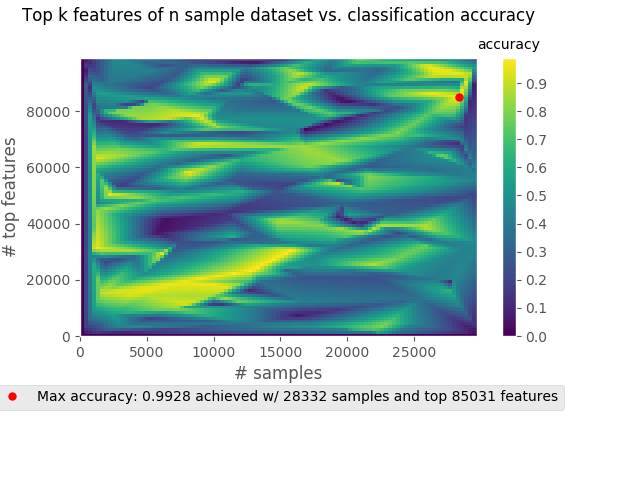

In [26]:
graphHeatmap(real_elem, real_feat, real_scores, interpMethod="linear", saGridMin=0, saGridMax=30000, saGridStep=300, fGridMin=0, fGridMax=100000, fGridStep=1000)

In [27]:
def graph3D(numSamplesList, numTopFeaturesList, scoresList, interpMethod="none",
            saGridMin=None, saGridMax=None, saGridStep=None, fGridMin=None, fGridMax=None, fGridStep=None):
    """
    plot a 3D visualization of classification results, and optionally an interpolated view where interpolation points
    are determined by a bounded grid.
    
    For example: saGridMin=0, saGridMax=5000, saGridStep=25, fGridMin=0, fGridMax=1000, fGridStep=10
    Interpolation will occur at 200 * 100 = 20,000 points in a grid bounded by (0, 5000), (0, 1000) with samples step-size=25 and feature step-size=10
    
    (0,0)   , (0, 10)  , (0, 20)  , ... (0, 990)
    (25,0)  , (25, 10) , (25, 20) , ... (25, 990)   
    .
    .
    .
    (4975,0), (4975,10), (4975,20), ... (4975, 990)
    
    Parameters ------
    numSamplesList: array-like 
        array where when flattened, ith element corresponds to number of samples used during ith train/test evaluation
    numTopFeaturesList: array-like
        array where when flattened, ith element corresponds to number of top features used during ith train/test evaluation
    scoresList: array-like
        array where when flattened, ith element corresponds to classifier score on dataset using numSamplesList[i] samples
        and top numTopFeaturesList[i] features
    interpMethod: string (optional)
        one of "none", "nearest", "linear", or "cubic". If not none, will perform 3D interpolation using scipy.interpolate.griddata with specified interpolation method
    saGridMin: int
        first point to interpolate samples at 
    saGridMax: int
        last point to interpolate samples at
    saGridStep: int
        step-size for samples interpolation
    fGridMin: int
        first point to interpolate top features at
    fGridMax: int
        last point to interpolate top features at
    fGridStep: int
        step-size for top features interpolation
    """
    
    flattenedSamples = np.ravel(numSamplesList)
    flattenedFeats = np.ravel(numTopFeaturesList)
    flattenedScores = np.ravel(scoresList)
    
    maxSamples, maxFeats, maxScore = bestParams(flattenedSamples, flattenedFeats, flattenedScores)
    
    fig = plt.figure()
    fig.suptitle("Top k features of n sample dataset vs. classification accuracy", fontsize=14)
    
    if interpMethod != "none":
        gridSamples, gridFeats = np.mgrid[saGridMin:saGridMax:saGridStep, fGridMin:fGridMax:fGridStep]
        gridScores = griddata((flattenedSamples, flattenedFeats), flattenedScores, (gridSamples, gridFeats), method=interpMethod)
        
        fig.set_size_inches(10,4)
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(flattenedSamples, flattenedFeats, flattenedScores, s=10, alpha=.5)
        ax.scatter(maxSamples, maxFeats, maxScore, c='blue', s=15)
        ax.set_xlabel("# samples")
        ax.set_ylabel("# top features")
        ax.set_zlabel("accuracy")
        ax.tick_params(axis='both', which='major', labelsize=8)
        
        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(gridSamples, gridFeats, gridScores, s=.5, alpha=.1)
        ax.scatter(maxSamples, maxFeats, maxScore, c='blue', s=15, label="Max accuracy: {} achieved w/ {} samples and top {} features".format(round(maxScore, 4), maxSamples, maxFeats))
        ax.set_xlabel("# samples")
        ax.set_ylabel("# top features")
        ax.set_zlabel("accuracy")
        ax.set_title("Interpolated", fontsize=10, y=1.07)
        ax.tick_params(axis='both', which='major', labelsize=8)
        
        ax.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.15))
        plt.subplots_adjust(bottom=.2)
        
    else:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(flattenedSamples, flattenedFeats, flattenedScores, s=10, alpha=.5)
        ax.scatter(maxSamples, maxFeats, maxScore, c='blue', s=15, label="Max accuracy: {} achieved w/ {} samples and top {} features".format(round(maxScore, 4), maxSamples, maxFeats))
        ax.set_xlabel("# samples")
        ax.set_ylabel("# top features")
        ax.set_zlabel("accuracy")
        ax.tick_params(axis='both', which='major', labelsize=8)
        
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
        plt.subplots_adjust(bottom=.2)
    

<IPython.core.display.Javascript object>


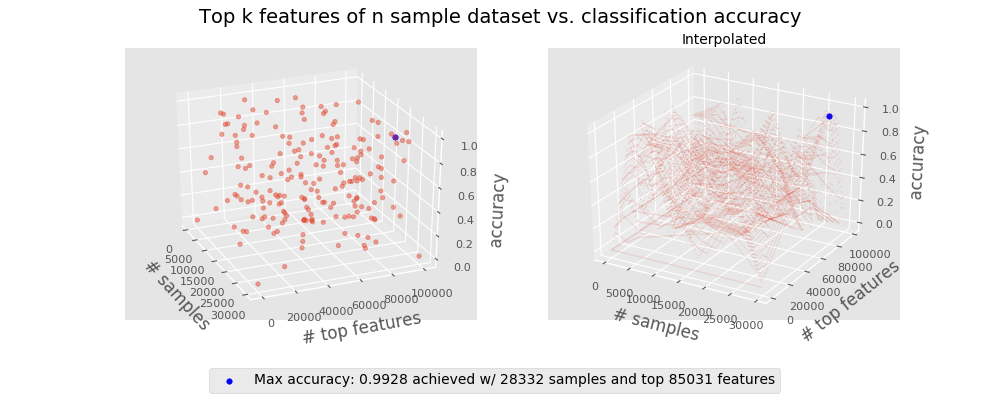

In [28]:
graph3D(real_elem, real_feat, real_scores, interpMethod="linear", saGridMin=0, saGridMax=30000, saGridStep=300, fGridMin=0, fGridMax=100000, fGridStep=1000)

In [24]:
def bestParams(numSamplesList, numTopFeaturesList, scoresList):
    """
    return a 3-tuple (samples, topFeatures, score) corresponding to the parameters that resulted in highest score
    
    Parameters ------
    numSamplesList: array-like 
        array where when flattened, ith element corresponds to number of samples used during ith train/test evaluation
    numTopFeaturesList: array-like
        array where when flattened, ith element corresponds to number of top features used during ith train/test evaluation
    scoresList: array-like
        array where when flattened, ith element corresponds to classifier score on dataset using numSamplesList[i] samples
        and top numTopFeaturesList[i] features
    """
    
    flattenedSamples = np.ravel(numSamplesList)
    flattenedFeat = np.ravel(numTopFeaturesList)
    flattenedScores = np.ravel(scoresList)
    
    assert(len(flattenedSamples) == len(flattenedFeat) and len(flattenedSamples) == len(flattenedScores)),\
    "Size mismatch: numTopFeaturesList: length {}\tnumSamplesList: length {}\tscoresList: length {}"\
    .format(len(flattenedSamples), len(flattenedFeat), len(flattenedScores))
    
    argMax = np.argmax(flattenedScores)
    return (flattenedSamples[argMax], flattenedFeat[argMax], flattenedScores[argMax])
    

In [30]:
numSamplesList = real_elem
numTopFeaturesList = real_feat
scoresList = real_scores

saGridMin = 0
saGridMax = 30000
saGridStep = 300

fGridMin = 0
fGridMax = 100000
fGridStep = 1000

flattenedSamples = np.ravel(numSamplesList)
flattenedFeats = np.ravel(numTopFeaturesList)
flattenedScores = np.ravel(scoresList)

maxSamples, maxFeats, maxScore = bestParams(flattenedSamples, flattenedFeats, flattenedScores)

gridSamples, gridFeats = np.mgrid[saGridMin:saGridMax:saGridStep, fGridMin:fGridMax:fGridStep]
gridScores = griddata((flattenedSamples, flattenedFeats), flattenedScores, (gridSamples, gridFeats), method='linear')

In [57]:
trace = Scatter3d(
    x=np.ravel(gridSamples),
    y=np.ravel(gridFeats),
    z=np.ravel(gridScores),
    mode='markers',
    marker=dict(
        size=1,
        opacity=0.2
    )
)

maxTrace = Scatter3d(
    x=[maxSamples],
    y=[maxFeats],
    z=[maxScore],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(255,0,0)',
        opacity=1.0
    ))
data = [trace, maxTrace]
plotly.offline.iplot(data)